# Case Study : Loan Approval Prediction

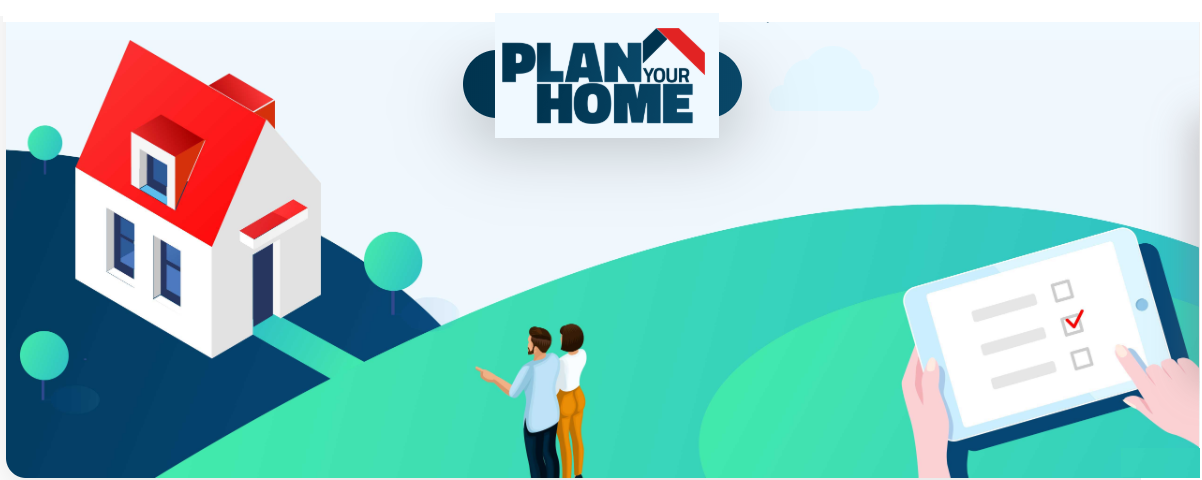

This case study will help us to understand the stages in the data science project lifecycle with loans data set to predict whether the loan will be approved or not. We will focus on the following four stages namely -

- Business Understanding
- Data Acquisition
- Data Preparation
- Exploratory Data Analysis
- Feature Engineering
- Model Building and Selection

# 1. Business Understanding

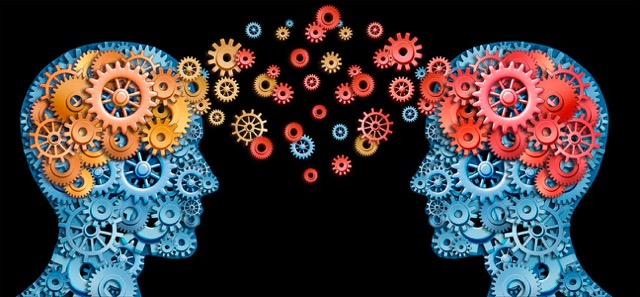

"HomePlanners" offers home loans with very less EMIs and interest rates starting from 8.25%* p.a.. They are helping the people to create a space of their own with Home Loans. The home Loans are tailor made for salaried individuals as well as the other individuals as they offer an attractive rate of interest and a longer tenure. They also provide the home buyers with legal and technical counselling to help them make the right home buying decision. Its an opportunity for the home buyers to bring their dream home into reality with "HomePlanners" Home Loans With benefits such as a low-interest rate, longer tenure, comfortable home loan EMI and doorstep service etc. 

They are having dedicated workforces deployed into the field catering to the different regions like urban , semi-urban and rural areas. The home loan products sales team reaches the customers through different channels. Once the initial consultation is done, then customer are asked to submit an application for the home loan in which many intersting characteristics of customers are captured. Then based on this information provided, the loan approval team decides whether to consider the application for the disbursement or not. The various attributes that plays important role in this approval process are gender, income, number of applicants, marital status, loan demand and term , past history of customer with bank etc. 

This process of decision making is time consuming as lot of time is required for the screening of the information. The bank is looking at the opportunity to automate the process of approval. They want to identify the different customer segements, which are eligible for loan amount so they can just target those customers only. 

It seems to be a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, discrete values are predicted based on a given set of independent variable(s). <br>

Classification can be of two types:

- Binary Classification : Predicts either of the two given classes. For example: identifying loan will be approved or not, 
student will take admission or not, customer will buy or not<br>
- Multiclass Classification : Classify the data into more than two discrete classes. For example: identifying what customer is going to buy whether book, electronic item or appearals, classifying the customers into high , middle or low income ranges etc.

Then need to think about the different factors that can affect the loan approval. Few of the immediate one can be listed as follows - <br>
- income of applicant
- is applicant self employed or salaried
- age of applicant
- job type of applicant 
- marital status 
- credit history for previous loans
- loan amount 
- tenure of the loan etc.<br><br>
Lets see what all factors will play significant role in the loan approval.

# 2. Data Acquisition 
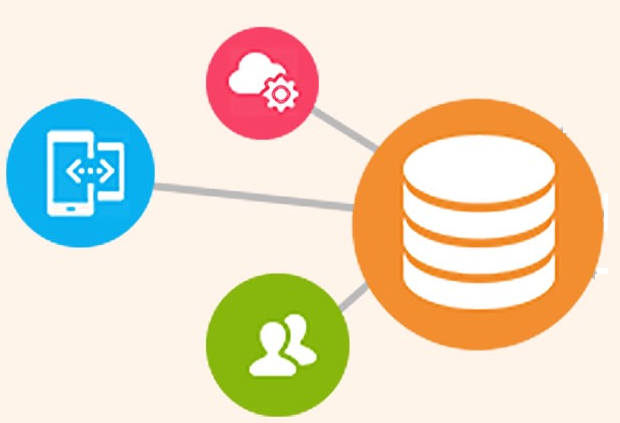

As the customer categories are different like Urban, Semi-urban and rural, the dataset is provided into three different CSV files. We need to acquire these datasets and prepare a dataframe which can be used for further for data exploration and model building. 

### 2.1 Package Imports

In [1]:
#Need to import the required packages
import pandas as pd 
import numpy as np                    
import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline 
import warnings                       

### 2.2 Reading data from Loans Datasets

In [2]:
urban_data=pd.read_csv("Urban_loans.csv") 
urban_data.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved
0,L1,M,Yes,NaN,Grad,2600,0,115.0,NaN,3500,Yes,Y
1,L2,M,Yes,0.0,Grad,5649,1,44.0,360.0,0,Yes,Y


In [3]:
semiurban_data=pd.read_csv("Semi_Urban_loans.csv") 
semiurban_data.head(2)

,LID,Gender,Applicant_Income,Dependents,Education,Marrital_Status,Self_Employed,LoanAmt,LoanAmountTerm,Coapplicant_Income,Credit_History,Approved
0,Semi76,M,9560,0,G,1.0,Yes,191.0,360,0,1.0,1
1,Semi77,M,1875,2,NG,1.0,Yes,97.0,360,1875,1.0,1


In [4]:
rural_data=pd.read_csv("Rural_loans.csv") 
rural_data.head(2)

,Loan_ID,Sex,Marrital_Status,DependentsCount,Self_Employed,Education,Loan_Term,LoanAmount,Income,Loan_Status
0,R36,NaN,Yes,2,0.0,NG,360,112.0,3365,No
1,R37,1.0,Yes,1,0.0,NG,180,113.0,2653,No


### 2.3 Confirm the imports

Lets now check whether all the records are imported into the data frames by checking the numner of rows and columns.

In [5]:
urban_data.shape

(35, 12)

In [6]:
semiurban_data.shape

(39, 12)

In [7]:
rural_data.shape

(40, 10)

### 2.4 Quick Look at columns 

As the data is coming from three different sources, lets quickly look at the structure of the data frames and the actual data values present in the columns in order to idenfity the similarities and dissimilaries between them. Pandas should be able to help us in doing this.

In [8]:
urban_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved'],
      dtype='object')

In [9]:
semiurban_data.columns

Index(['LID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       'Coapplicant_Income', 'Credit_History', 'Approved'],
      dtype='object')

In [10]:
rural_data.columns

Index(['Loan_ID', 'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
       'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status'],
      dtype='object')

Though the columns looks similar but still the naming of these columns is different. We need to do a careful analysis of each and every columns of these three dataframes. After looking at the columns, its now time go ahead and have look at the unique values of similar columns.

# 3. Data Preparation
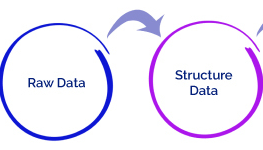

As we have seen the data is coming from three different data sources, a lot data preprocessing needs to be done to standardize the columns and the data values present in it. Lets try them out one by one.

In [11]:
columns = set(urban_data.columns.append(semiurban_data.columns).append(rural_data.columns))
columns

{'Applicant_Income',
 'Approved',
 'CoapplicantIncome',
 'Coapplicant_Income',
 'Credit_History',
 'Dependents',
 'DependentsCount',
 'Education',
 'Gender',
 'Income',
 'LID',
 'LoanAmount',
 'LoanAmountTerm',
 'LoanAmt',
 'Loan_Amt',
 'Loan_ID',
 'Loan_Status',
 'Loan_Term',
 'Married',
 'Marrital_Status',
 'Self_Employed',
 'Sex',
 'Tenure'}

Oh! there seems to be lot of attributes present in these datasets which are having same meanings but are named differently.

- Loan_ID, LID seems to be same
- CoapplicantIncome, Coapplicant_Income seems to be same
- Dependents, DependentsCount are same
- LoanAmount, LoanAmt, Loan_Amt are same
- LoanAmountTerm, Loan_Term and Tenure are same
- Married, Marrital_Status are same
- Gender, Sex are same
- Income, Applicant_Income are same
- Approved, Loan_Status are same and seems to be target variable

We can think of the following columns for the merged datasets. 

- Loan_ID
- Gender
- Married
- Tenure
- Education
- Self_Employed
- Income
- CoapplicantIncome
- Credit_History
- Dependents
- Loan_Amt
- Approved ( Target)

### 3.1 Checking for unique data values

Lets try to bring all the data values of the different columns into the same format. A lot of preprocessing needs to be done in order to bring this commanality into the data values.

In [12]:
#For urban_data
print(urban_data['Gender'].unique())
print(urban_data['Married'].unique())
print(urban_data['Self_Employed'].unique())
print(urban_data['Education'].unique())
print(urban_data['Credit_History'].unique())
print(urban_data['Approved'].unique())

['M' nan 'F']
['Yes' 'No']
[nan  0.  1.]
['Grad' 'NonGrad']
['Yes' 'No' nan]
['Y' 'N']


In [13]:
#For Semi_urban_data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
[ 1. -1. nan]
['Yes' 'No' nan]
['G' 'NG']
[ 1. nan  0.]
[1 0]


In [14]:
#For rural_data
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan  1.  0.]
['Yes' 'No']
[ 0.  1. nan]
['NG' 'G']
['No' 'Yes']


These are the common columns into the three data frames but the actual data values are encoded differently. We need to arrive at a common format for the data values for the columns like 'Gender', 'Married', 'Education' and 'Approved'. Lets try to standardize the data frames from the imported datasets.

### 3.2 Standardize Urban loan data

In [15]:
#Prepare urban_df from the urban_data dataframe and manipulate it further
urban_df = pd.DataFrame()
urban_df['Loan_ID'] = urban_data['Loan_ID']
urban_df['Gender'] = urban_data['Gender']
urban_df['Married'] = urban_data['Married']
urban_df['Self_Employed'] = urban_data['Self_Employed']
urban_df['Education'] = urban_data['Education']
urban_df['Applicant_Income'] = urban_data['Applicant_Income']
urban_df['Dependents'] = urban_data['Dependents']
urban_df['Loan_Amt'] = urban_data['Loan_Amt']
urban_df['Tenure'] = urban_data['Tenure']
urban_df['CoapplicantIncome'] = urban_data['CoapplicantIncome']
urban_df['Credit_History'] = urban_data['Credit_History']
urban_df['Property_Location'] = "URBAN"    # Need to maintain the area for which loan is demanded
urban_df['Approved'] = urban_data['Approved']
urban_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,Grad,2600,0,115.0,NaN,3500,Yes,URBAN,Y
1,L2,M,Yes,0.0,Grad,5649,1,44.0,360.0,0,Yes,URBAN,Y


In [16]:
#For urban_data
print(urban_data['Gender'].unique())
print(urban_data['Married'].unique())
print(urban_data['Self_Employed'].unique())
print(urban_data['Education'].unique())
print(urban_data['Credit_History'].unique())
print(urban_data['Approved'].unique())

['M' nan 'F']
['Yes' 'No']
[nan  0.  1.]
['Grad' 'NonGrad']
['Yes' 'No' nan]
['Y' 'N']


### 3.3 Standardize SemiUrban loan data

In [17]:
#For semiurban_data , lets explore unique data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
[ 1. -1. nan]
['Yes' 'No' nan]
['G' 'NG']
[ 1. nan  0.]
[1 0]


In [18]:
#Standardize the 'Marrital_Status'
semiurban_data['Marrital_Status'].replace(1, 'Yes', inplace= True)
semiurban_data['Marrital_Status'].replace(-1, 'No', inplace= True)
semiurban_data['Marrital_Status'][0:5]

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: Marrital_Status, dtype: object

In [19]:
#Standardize the 'Self_Employed'
semiurban_data['Self_Employed'].replace('Yes', 1, inplace= True)
semiurban_data['Self_Employed'].replace('No', 0, inplace= True)
semiurban_data['Self_Employed'][0:5]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Self_Employed, dtype: float64

In [20]:
#Standardize the 'Education'
semiurban_data['Education'].replace('G', 'Grad', inplace= True)
semiurban_data['Education'].replace('NG', 'NonGrad', inplace= True)
semiurban_data['Education'][0:5]

0       Grad
1    NonGrad
2       Grad
3    NonGrad
4       Grad
Name: Education, dtype: object

In [21]:
#Standardize the 'Credit_History'
semiurban_data['Credit_History'].replace(1, 'Yes', inplace= True)
semiurban_data['Credit_History'].replace(0, 'No', inplace= True)
semiurban_data['Credit_History'][0:5]

0    Yes
1    Yes
2    NaN
3    Yes
4     No
Name: Credit_History, dtype: object

In [22]:
#Standardize the 'Approved'
semiurban_data['Approved'].replace(1, 'Y', inplace= True)
semiurban_data['Approved'].replace(0, 'N', inplace= True)
semiurban_data['Approved'][0:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Approved, dtype: object

In [23]:
#Prepare semiurban_df from the semiurban_data dataframe and manipulate it further
semiurban_df = pd.DataFrame()
semiurban_df['Loan_ID'] = semiurban_data['LID']
semiurban_df['Gender'] = semiurban_data['Gender']
semiurban_df['Married'] = semiurban_data['Marrital_Status']
semiurban_df['Self_Employed'] = semiurban_data['Self_Employed']
semiurban_df['Education'] = semiurban_data['Education']
semiurban_df['Applicant_Income'] = semiurban_data['Applicant_Income']
semiurban_df['Dependents'] = semiurban_data['Dependents']
semiurban_df['Loan_Amt'] = semiurban_data['LoanAmt']
semiurban_df['Tenure'] = semiurban_data['LoanAmountTerm']
semiurban_df['CoapplicantIncome'] = semiurban_data['Coapplicant_Income']
semiurban_df['Credit_History'] = semiurban_data['Credit_History']
semiurban_df['Property_Location'] = "SEMI_URBAN" # Need to maintain the area for which loan is demanded
semiurban_df['Approved'] = semiurban_data['Approved']
semiurban_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,Semi76,M,Yes,1.0,Grad,9560,0,191.0,360,0,Yes,SEMI_URBAN,Y
1,Semi77,M,Yes,1.0,NonGrad,1875,2,97.0,360,1875,Yes,SEMI_URBAN,Y


In [24]:
#For semiurban_data , lets explore unique data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
['Yes' 'No' nan]
[ 1.  0. nan]
['Grad' 'NonGrad']
['Yes' nan 'No']
['Y' 'N']


### 3.4 Standardize Rural loan data

In [25]:
#For rural_data, lets explore the rural data frame
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan  1.  0.]
['Yes' 'No']
[ 0.  1. nan]
['NG' 'G']
['No' 'Yes']


In [26]:
#Standardize the 'Sex'
rural_data['Sex'].replace(1, 'M', inplace= True)
rural_data['Sex'].replace(0, 'F', inplace= True)
rural_data['Sex'][0:5]

0    NaN
1      M
2      M
3      M
4      M
Name: Sex, dtype: object

In [27]:
#Standardize the 'Education'
rural_data['Education'].replace('NG', 'NonGrad', inplace= True)
rural_data['Education'].replace('G', 'Grad', inplace= True)
rural_data['Education'][0:5]

0    NonGrad
1    NonGrad
2       Grad
3       Grad
4       Grad
Name: Education, dtype: object

In [28]:
#Standardize the 'Loan_Status'
rural_data['Loan_Status'].replace('No', 'Y', inplace= True)
rural_data['Loan_Status'].replace('Yes', 'N', inplace= True)
rural_data['Loan_Status'][0:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Loan_Status, dtype: object

In [29]:
#Prepare rural_df from the rural_data dataframe and manipulate it further
rural_df = pd.DataFrame()
rural_df['Loan_ID'] = rural_data['Loan_ID']
rural_df['Gender'] = rural_data['Sex']
rural_df['Married'] = rural_data['Marrital_Status']
rural_df['Self_Employed'] = rural_data['Self_Employed']
rural_df['Education'] = rural_data['Education']
rural_df['Applicant_Income'] = rural_data['Income']
rural_df['Dependents'] = rural_data['DependentsCount']
rural_df['Loan_Amt'] = rural_data['LoanAmount']
rural_df['Tenure'] = rural_data['Loan_Term']
rural_df['CoapplicantIncome'] = 0
rural_df['Credit_History'] = "No"
rural_df['Property_Location'] = "RURAL" # Need to maintain the area for which loan is demanded
rural_df['Approved'] = rural_data['Loan_Status']
rural_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,R36,NaN,Yes,0.0,NonGrad,3365,2,112.0,360,0,No,RURAL,Y
1,R37,M,Yes,0.0,NonGrad,2653,1,113.0,180,0,No,RURAL,Y


In [30]:
#For rural_data
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan 'M' 'F']
['Yes' 'No']
[ 0.  1. nan]
['NonGrad' 'Grad']
['Y' 'N']


### 3.5 Merge the loan dataframes

As we need to prepare a generalized data model for all the loan cases, its necessary for us to merge the three dataframes horizontally with each other so that we can have data for all the loan which are approved.

In [31]:
merged_frames = [urban_df, semiurban_df, rural_df]
loan_data = pd.concat(merged_frames)

In [32]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Property_Location', 'Approved'],
      dtype='object')

Look at the datatypes of columns as well!

In [33]:
loan_data.head()

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,Grad,2600,0,115.0,NaN,3500,Yes,URBAN,Y
1,L2,M,Yes,0.0,Grad,5649,1,44.0,360.0,0,Yes,URBAN,Y
2,L3,M,Yes,0.0,Grad,3988,1,50.0,240.0,0,Yes,URBAN,Y
3,L4,M,Yes,1.0,Grad,3316,2,88.0,360.0,3500,Yes,URBAN,Y
4,L5,NaN,Yes,0.0,Grad,51763,3+,700.0,300.0,0,Yes,URBAN,Y


Let’s look at the shape of the dataset.

In [34]:
loan_data.shape

(114, 13)

It means we have 12 independent variables and one target variable i.e. 'Approved'.

# 4. Exploratory Data Analysis
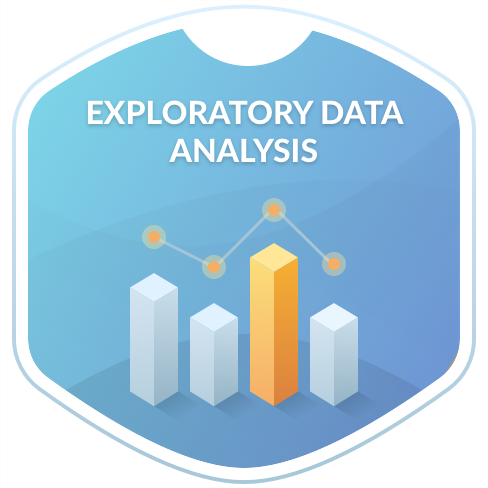

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. 

Lets try to do the EDA with the set of attributes present in the loan dataset that we have prepared. We can try following type of analysis<br>
- Univariate Analysis  - explore individual attribute
- Bivariate Analyis - explore relationship between two attributes

## 4.1 Univariate Analysis

In [35]:
# Set the color coding/ colormap for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')
cmap2 = cm.get_cmap('tab20')

#### 4.1.1 Explore Target Variable

Count of each target variable category will give some insights about the samples those are available for the prediction. 

In [36]:
loan_data['Approved'].value_counts()

Y    64
N    50
Name: Approved, dtype: int64

In [37]:
64 / (64 + 50)

0.5614035087719298

Almost 56% of loans are approved!  (= 64 / 64 + 50). Lets visualize it. 

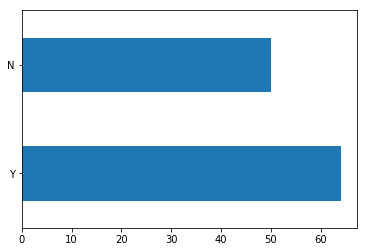

In [38]:
loan_data['Approved'].value_counts().plot.barh(cmap=cmap2)

#### 4.1.2 Explore Categorical (Nominal) Independent Variable

Lets try to understand about more about the categorical nominal variables like 'Gender', 'Married', "Self_Employed' and 'Credit_History'.

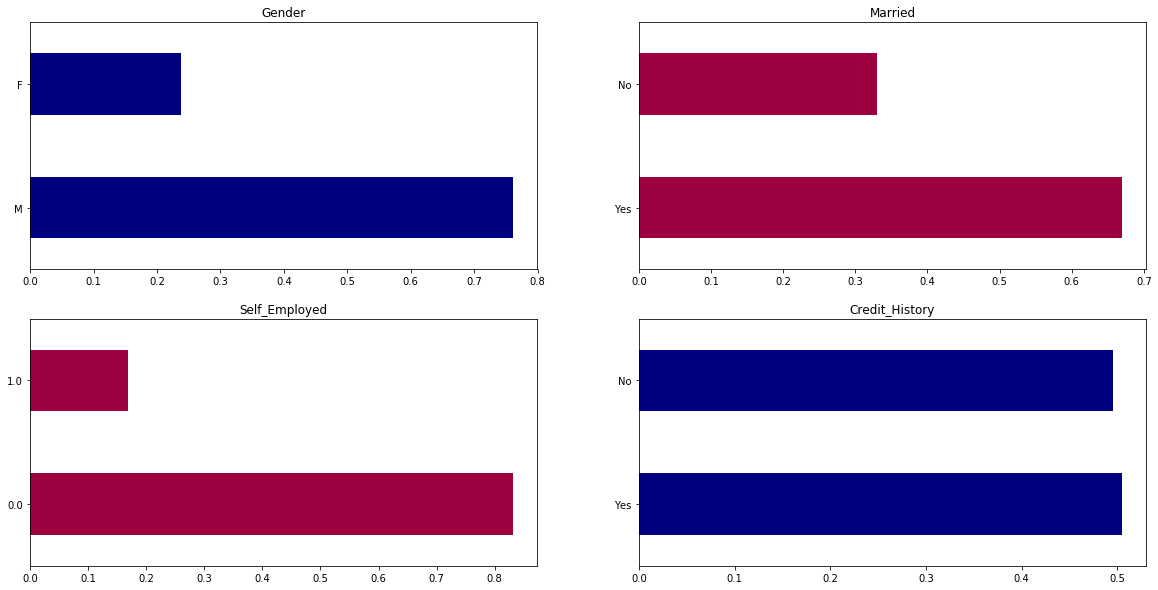

In [39]:
#Prepare a 2 by 2 layout two render these categorical attributes
plt.figure(1) 

plt.subplot(221) 
loan_data['Gender'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Gender') 

plt.subplot(222) 
loan_data['Married'].value_counts(normalize=True).plot.barh(title= 'Married', cmap=cmap1) 

plt.subplot(223) 
loan_data['Self_Employed'].value_counts(normalize=True).plot.barh(title= 'Self_Employed', cmap=cmap1) 

plt.subplot(224) 
loan_data['Credit_History'].value_counts(normalize=True).plot.barh(title= 'Credit_History', cmap=cmap) 
plt.show()

The inferences are : 

- 75% applicants are male. 
- 67% of the applicants are married.
- 15% applicants are self employed. Need to confirm whether '0.0' is representing "Self_employed".
- Allmost equal number of applicants are there in the regular and defaulter list

#### 4.1.2 Explore Categorical (Ordinal) Independent Variable

Lets try to understand about more about the categorical ordinal variables like 'Dependents', 'Education', and 'Property_Location'.

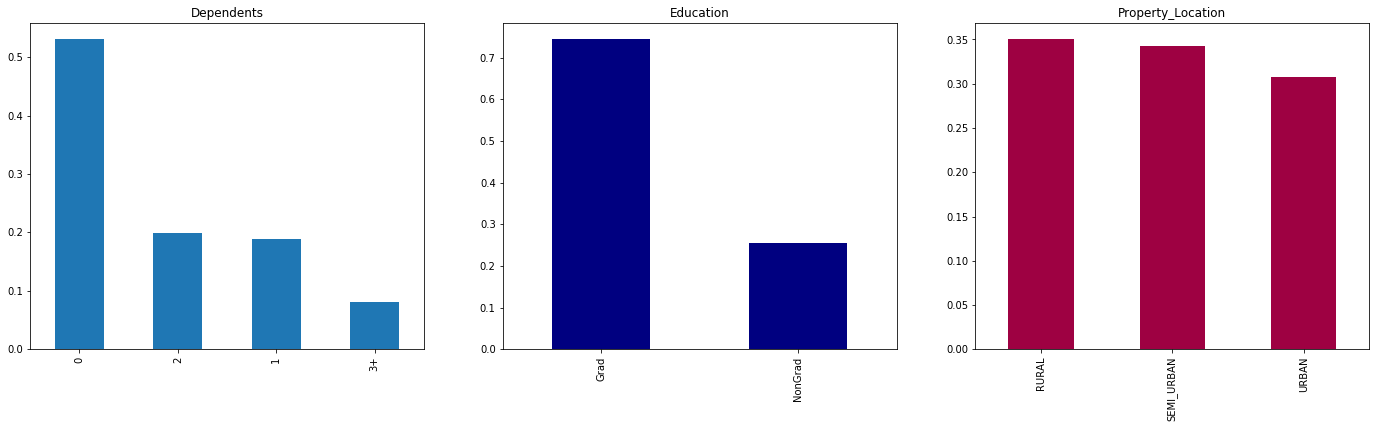

In [40]:
#Prepare a layout two render these categorical attributes
plt.figure(1) 

plt.subplot(131) 
loan_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
loan_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education', cmap=cmap) 

plt.subplot(133) 
loan_data['Property_Location'].value_counts(normalize=True).plot.bar(title= 'Property_Location', cmap=cmap1) 
plt.show()

The inferences are :

- Applicants with more than three dependents are very less as compared to the ones who are not having any dependents.
- More educated applicants are demanding the loans
- Almost equal number of samples are drawn from all the localities.

#### 4.1.3 Explore Numerical Independent Variable

Lets try to understand about more about the numeric attribute like 'Applicant_Income', 'CoapplicantIncome' and 'Loan_Amt'.

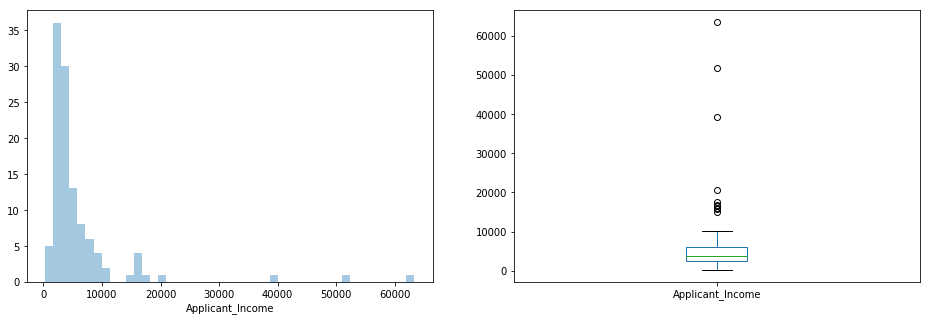

In [41]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_data['Applicant_Income'], hist=True, kde=False); 

plt.subplot(122) 
loan_data['Applicant_Income'].plot.box(figsize=(16,5)) 
plt.show()

The inferences are :
- Applicant_Income is more tilted towards the left side of the data distribution. Need to normalize it further.
- Almost all applicants have income less than 10000 but still few applicants are falling in higher income bracket.

Lets see if the education level has some impact on the income or not

Text(0.5, 0.98, '')

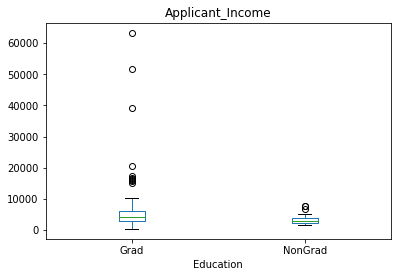

In [42]:
loan_data.boxplot(column='Applicant_Income', by = 'Education', grid=False,) 
plt.suptitle("")

Inference : 
- More number of graduates are applying for loans as compared to non graduates. 
- People in higher income bracket and are graduates are seems to be exceptional cases. 

Let’s look at the Coapplicant income distribution.

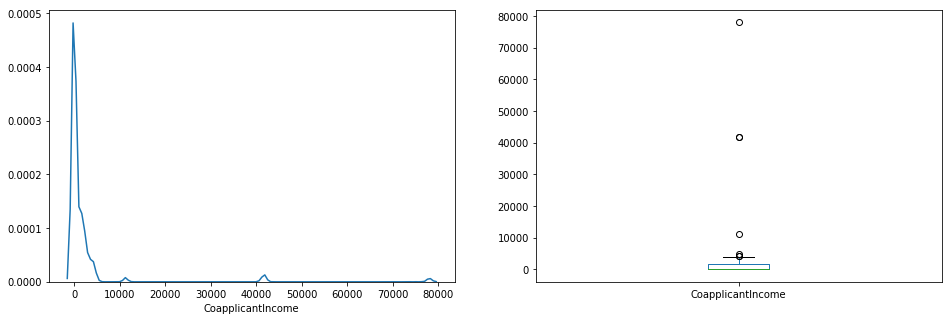

In [43]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_data['CoapplicantIncome'], hist=False, kde=True); 

plt.subplot(122) 
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Inference : 
- Almost similar distribution is seen as that of applicant income. 

Let’s look at the distribution of Loan_Amt variable.

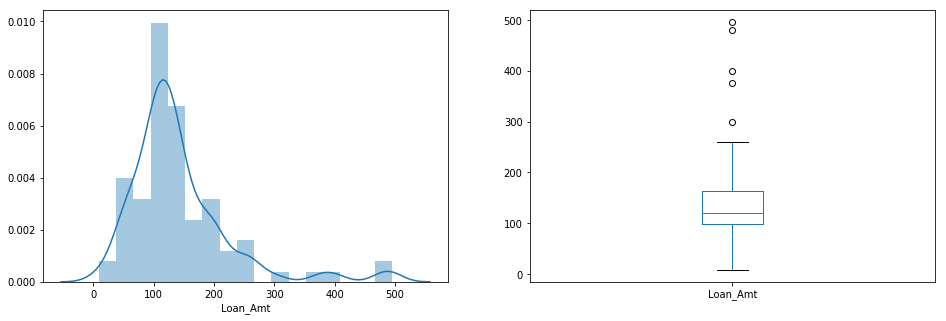

In [44]:
plt.figure(1) 
plt.subplot(121) 
df=loan_data.dropna() 
sns.distplot(df['Loan_Amt']); 

plt.subplot(122) 
df['Loan_Amt'].plot.box(figsize=(16,5)) 
plt.show()

Inference : 
- Loan_Amt distribution is normal. 
- Some outliers are present which need to be handled afterwards.

## 4.2 Bivariate Analysis

We got fair idea about the distribution of the categorical and numerical attributes present in data frame. Lets explore the relationship between these variables and the target.

#### 4.2.1 Compare Categorical Variables with Target

In [45]:
#Set the visuzalization style
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

Lets explore relationship between 'Gender' and approval status.

In [46]:
Gender=pd.crosstab(loan_data['Gender'],loan_data['Approved'])
Gender

Approved,N,Y
Gender,,
F,16,10
M,33,50


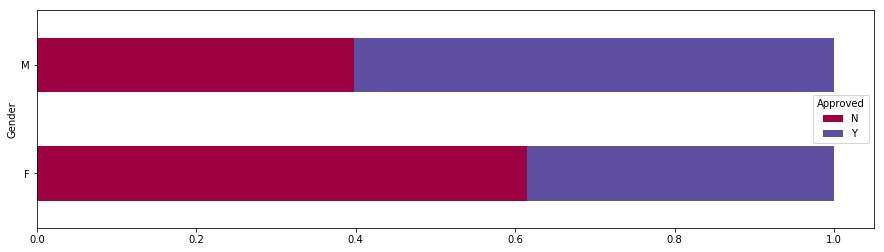

In [47]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(15,4))

Inference : 
- More or less same number of male/feamles are given loans or declined loans.

Now let us visualize the remaining categorical variables vs target variable.

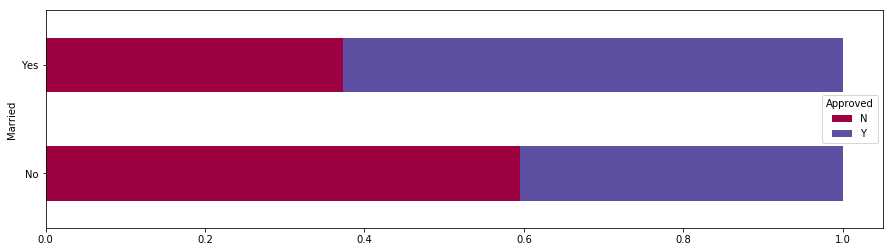

In [48]:
Married=pd.crosstab(loan_data['Married'],loan_data['Approved'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(15,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Proportion of unmarried applicants is higher for the rejected loans.


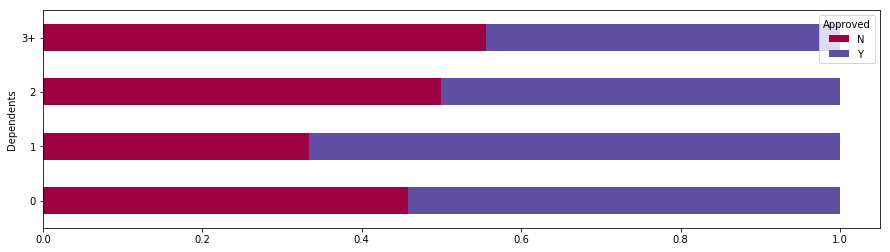

In [49]:
Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Approved']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(15,4)) 
plt.show()

- Distribution of applicants with 0, 2 or 3+ dependents is similar across both the categories of Loan_Status.
- Applicants with only single dependents are approved more loans.

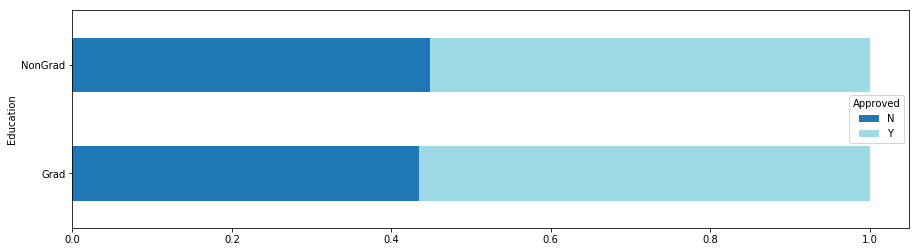

In [50]:
Education=pd.crosstab(loan_data['Education'],loan_data['Approved']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap2,stacked=True, figsize=(15,4)) 
plt.show()

- NonGrads are declined loans more as compared Grads.

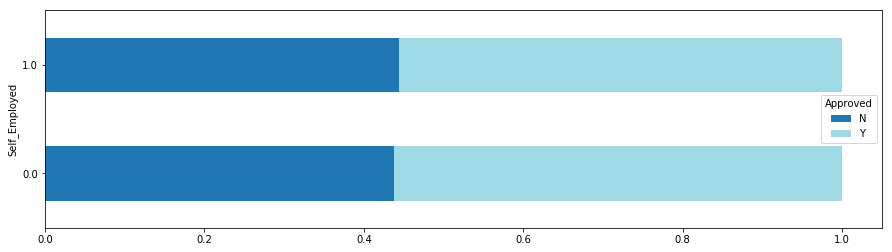

In [51]:
Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Approved']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap2,stacked=True, figsize=(15,4)) 
plt.show()

- There is nothing significant we can infer from Self_Employed vs Approved plot.

Now we will look at the relationship between remaining categorical independent variables and loan approval status.

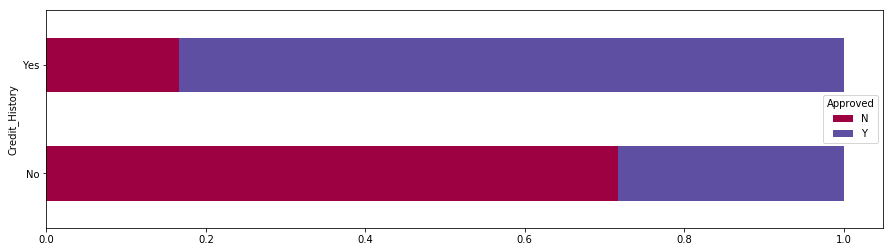

In [52]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Approved'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(15,4)) 
plt.show() 

- It seems people without any previous credit history are not approved of the loans. 

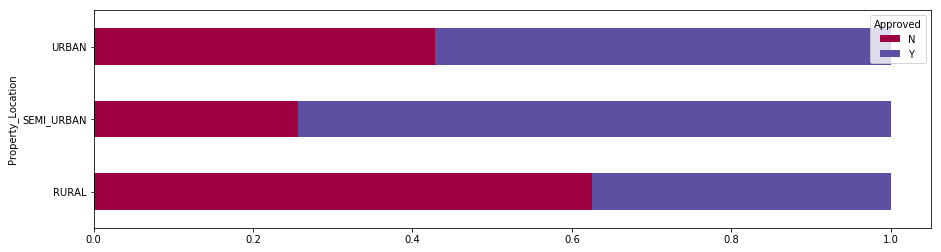

In [53]:
Property_Area=pd.crosstab(loan_data['Property_Location'],loan_data['Approved']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(15,4)) 
plt.show()

- It seems applicants from Rural area gets loans easily.

As discussed in the begining, lets see the variables that we considered as important from the loan approval perspective are really playing the significant role or not. <br>

- Salary: Applicants with high income should easily get loans.
- Credit history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: If the loan amount is less, chances of loan approval should be high.
- Loan tenure: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

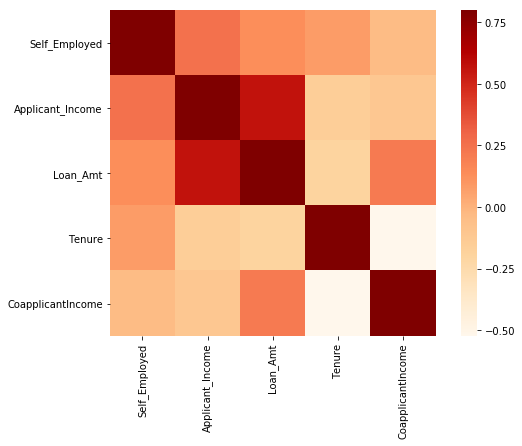

In [54]:
matrix = loan_data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

- Loan amount and income seems to be highly related. 
- Loan amount and coapplicant income seems to be highly related. 
- Income and employement status (self employed or salaried) are related.

# 5. Feature Engineering
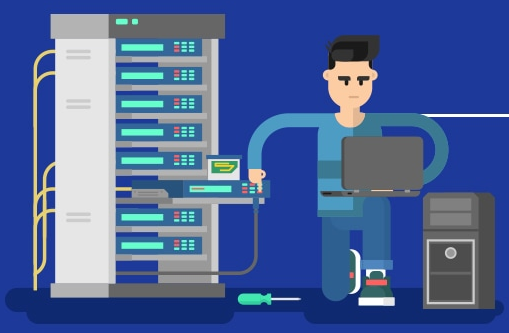

### 5.1 Handling Missing Values

Now lets focus on the treatment that can be given to the missing values as they might impact the model performance.

In [55]:
loan_data.isnull().sum()

Loan_ID              0
Gender               5
Married              2
Self_Employed        7
Education            0
Applicant_Income     0
Dependents           3
Loan_Amt             7
Tenure               2
CoapplicantIncome    0
Credit_History       7
Property_Location    0
Approved             0
dtype: int64

Columns like Gender, Married, Self_Employed, Dependents, Loan_Amt, Tenure and Credit_History have missing values. 

Methods to fill the missing values:
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode 

For categorical columns like Gender, Married, Dependents, Credit_History and Self_Employed,very less missing valuesare present  so lets fill them using the mode of the features.  

In [56]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True) 
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True) 
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True) 
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True) 
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Lets explore missing values in Tenure. 

In [57]:
loan_data['Tenure'].value_counts()

360.0    96
180.0     8
300.0     3
480.0     2
240.0     2
120.0     1
Name: Tenure, dtype: int64

The most frequent value is 360. So lets replace the missing values in this variable using the mode of this variable.

In [58]:
loan_data['Tenure'].fillna(loan_data['Tenure'].mode()[0], inplace=True)

For numeric variable like Loan_Amt, lets use mean or median to impute the missing values. As loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers. A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set.

In [59]:
loan_data['Loan_Amt'].fillna(loan_data['Loan_Amt'].median(), inplace=True)

Recheck the status of missing values.

In [60]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Self_Employed        0
Education            0
Applicant_Income     0
Dependents           0
Loan_Amt             0
Tenure               0
CoapplicantIncome    0
Credit_History       0
Property_Location    0
Approved             0
dtype: int64

No missing values for any of the columns!

### 5.2 Handling Outliers

In univariate analysis, we observed that income, loan amount has outliers present in it. So lets treat them as they affect the distribution of data.

One way to remove the skewness is by doing the log transformation. With log transformation, it does not affect the smaller values much, but reduces the larger values, so it gives a distribution similar to normal distribution.

Lets look at spread of Applicant_Income. 

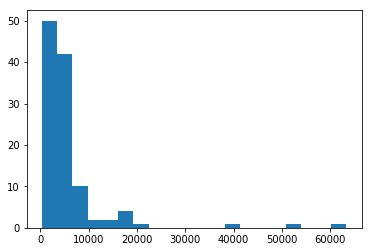

In [61]:
loan_data['Applicant_Income'].hist(bins=20, grid=False)

It seems to be bit right skewed so lets scale. 

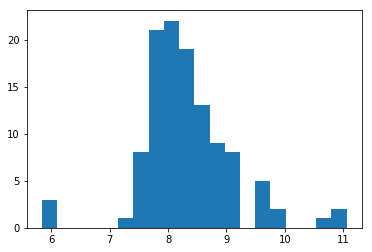

In [62]:
loan_data['Applicant_Income_log'] = np.log(loan_data['Applicant_Income']) 
loan_data['Applicant_Income_log'].hist(bins=20, grid=False)

Lets look at spread of Loan_Amt. 

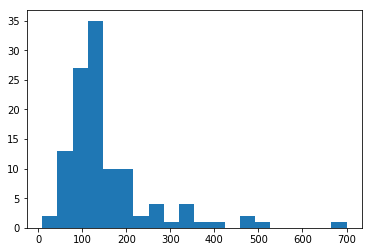

In [63]:
loan_data['Loan_Amt'].hist(bins=20, grid=False)

It seems to be bit left skewed so lets scale. 

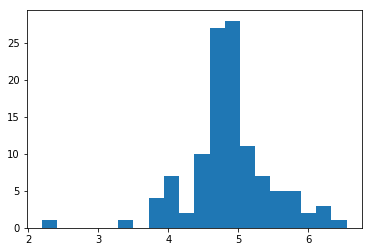

In [64]:
loan_data['Loan_Amt_log'] = np.log(loan_data['Loan_Amt']) 
loan_data['Loan_Amt_log'].hist(bins=20, grid=False)

Now the effect of the outliers is reduced a lot, so have crossed one more required step towards model building exercise.

### 5.3 Datatype conversion

Lets look at the data type of all the attributes before proceding further. 

In [65]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
Loan_ID                 114 non-null object
Gender                  114 non-null object
Married                 114 non-null object
Self_Employed           114 non-null float64
Education               114 non-null object
Applicant_Income        114 non-null int64
Dependents              114 non-null object
Loan_Amt                114 non-null float64
Tenure                  114 non-null float64
CoapplicantIncome       114 non-null int64
Credit_History          114 non-null object
Property_Location       114 non-null object
Approved                114 non-null object
Applicant_Income_log    114 non-null float64
Loan_Amt_log            114 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 14.2+ KB


Seems the categorical attributes are still shown as the objects, needs to convert them to categories. 

In [66]:
loan_data = loan_data.astype({"Gender":'category', "Married":'category',  "Education":'category', "Dependents":'category', "Credit_History":'category', "Property_Location":'category', "Approved":'category'}) 

In [67]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
Loan_ID                 114 non-null object
Gender                  114 non-null category
Married                 114 non-null category
Self_Employed           114 non-null float64
Education               114 non-null category
Applicant_Income        114 non-null int64
Dependents              114 non-null category
Loan_Amt                114 non-null float64
Tenure                  114 non-null float64
CoapplicantIncome       114 non-null int64
Credit_History          114 non-null category
Property_Location       114 non-null category
Approved                114 non-null category
Applicant_Income_log    114 non-null float64
Loan_Amt_log            114 non-null float64
dtypes: category(7), float64(5), int64(2), object(1)
memory usage: 9.6+ KB


### 5.3 Feature Creation

Looking at the dataset structure now, we can think of merging of the few exisitng features, deriving the new features. Lets perform these feature creations.

Total Income - Combine the Applicant Income and Coapplicant Income. Logic is if the total income is high, chances of loan default are less , hence approval chances might also be high.

In [68]:
loan_data['Total_Income']=loan_data['Applicant_Income'] + loan_data['CoapplicantIncome'] 

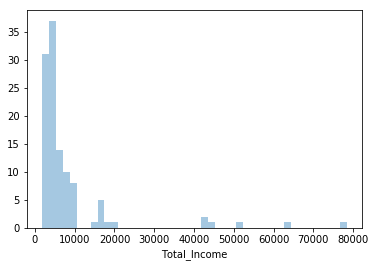

In [69]:
# Let’s check the distribution of Total Income.
sns.distplot(loan_data['Total_Income'], kde=False);

The distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

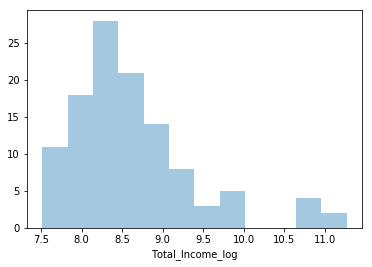

In [70]:
loan_data['Total_Income_log'] = np.log(loan_data['Total_Income']) 
sns.distplot(loan_data['Total_Income_log'], kde=False); 

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

EMI - Monthly Equated Installment amount to be paid by the applicant to repay the loan. Logic is people who have high EMI’s might find it difficult to pay back the loan.Derive the EMI by taking the ratio of loan amount with respect to loan tenure.

In [71]:
loan_data['EMI'] = loan_data['Loan_Amt']/loan_data['Tenure'] 

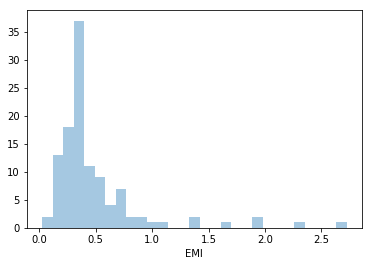

In [72]:
# Let’s check the distribution of EMI variable.
sns.distplot(loan_data['EMI'], kde=False);

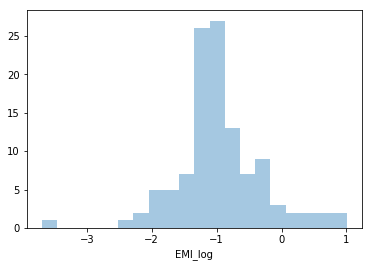

In [73]:
loan_data['EMI_log'] = np.log(loan_data['EMI']) 
sns.distplot(loan_data['EMI_log'], kde=False);

Balance Income - Income left after the EMI has been paid from total income. Logic is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

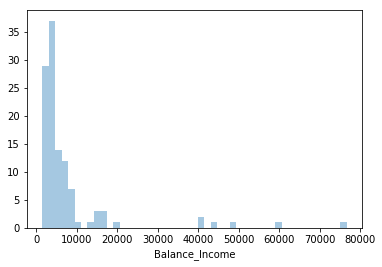

In [74]:
loan_data['Balance_Income'] = loan_data['Total_Income'] - (loan_data['EMI']*1000) 
# Multiply with 1000 to make the units equal 
sns.distplot(loan_data['Balance_Income'], kde=False);

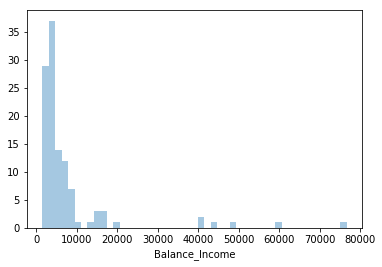

In [75]:
loan_data['Balance_Income_Log'] = np.log(loan_data['Balance_Income']) 
sns.distplot(loan_data['Balance_Income'], kde=False);

Now the original variables from which the derived attributes are generated , those can be easily dropped. 

In [76]:
loan_data = loan_data.drop(['Applicant_Income', 'CoapplicantIncome', 'Loan_Amt', 'Tenure', 'Total_Income', 'EMI', 'Balance_Income'], axis=1) 

Loan_ID is unique number attached to each loan application, its not doing much value addition as much, so lets remove it as well. 

In [77]:
loan_data = loan_data.drop(['Loan_ID'], axis=1) 

In [78]:
loan_data.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Approved',
       'Applicant_Income_log', 'Loan_Amt_log', 'Total_Income_log', 'EMI_log',
       'Balance_Income_Log'],
      dtype='object')

Lets use this prepared dataset for the model building now!

## 6. Model Building

As discussed earlier, this is binary classification, so lets explore one of the choices which is very widely used for the model preparation for binary classification.

Before that let's do some transformation of our processed/ clean data.

### 6.1 Some more transformations
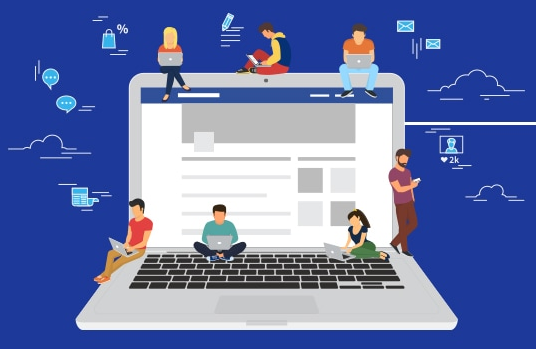

We need to separate the independent and target variables separately as the scikit implemenations require us to provide data in specific format only. 

In [79]:
#X is set of independant variables
X = loan_data.drop('Approved',1) 

#y is target variable
y = loan_data.Approved

In [80]:
X.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Applicant_Income_log',
       'Loan_Amt_log', 'Total_Income_log', 'EMI_log', 'Balance_Income_Log'],
      dtype='object')

The dataframe has dummy variables, but those also needs to be converted into dummies.

In [81]:
X = pd.get_dummies(X) 
loan_data = pd.get_dummies(loan_data)

In [82]:
X.columns

Index(['Self_Employed', 'Applicant_Income_log', 'Loan_Amt_log',
       'Total_Income_log', 'EMI_log', 'Balance_Income_Log', 'Gender_F',
       'Gender_M', 'Married_No', 'Married_Yes', 'Education_Grad',
       'Education_NonGrad', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Credit_History_No', 'Credit_History_Yes',
       'Property_Location_RURAL', 'Property_Location_SEMI_URBAN',
       'Property_Location_URBAN'],
      dtype='object')

In [83]:
X.head(2)

,Self_Employed,Applicant_Income_log,Loan_Amt_log,Total_Income_log,EMI_log,Balance_Income_Log,Gender_F,Gender_M,Married_No,Married_Yes,...,Education_NonGrad,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_No,Credit_History_Yes,Property_Location_RURAL,Property_Location_SEMI_URBAN,Property_Location_URBAN
0,0.0,7.863267,4.744932,8.716044,-1.141172,8.662255,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1,0.0,8.639234,3.784190,8.639234,-2.101914,8.617360,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


Need to train the model on training samples and make predictions using the testing samples.
For that purpose, need to use the train_test_split function from sklearn to divide our dataset.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

###  6.2 Model Building with kNN

- k-Nearest Neighbors (KNN) <br>
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.


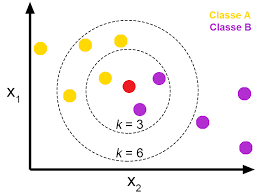

In [85]:
X.head(2)

,Self_Employed,Applicant_Income_log,Loan_Amt_log,Total_Income_log,EMI_log,Balance_Income_Log,Gender_F,Gender_M,Married_No,Married_Yes,...,Education_NonGrad,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_No,Credit_History_Yes,Property_Location_RURAL,Property_Location_SEMI_URBAN,Property_Location_URBAN
0,0.0,7.863267,4.744932,8.716044,-1.141172,8.662255,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1,0.0,8.639234,3.784190,8.639234,-2.101914,8.617360,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [86]:
y.head(2)

0    Y
1    Y
Name: Approved, dtype: category
Categories (2, object): [N, Y]

In [87]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

In [88]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 30% of the dataset.

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

Let's proceed further for building a classifier using k-Nearest Neighbors algorithm.

Performance of a classifier largely depends on the of the hyperparameter k
- Choosing smaller values for K, noise can have a higher influence on the result.
- Larger values of k are computationally expensive

Assigning the class labels can be tricky. For example, in the below case, for (k=5) the point is closer to ‘green’ classification, but gets classified as ‘red’ due to higher red votes/majority voting to ‘red’

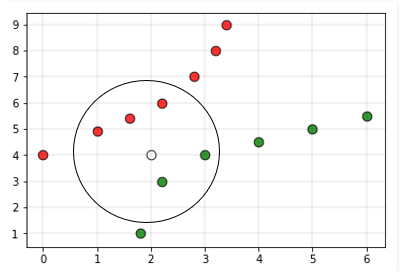

**Decision boundary in knn with different values of k**

Few ideas on picking a value for ‘K’

- There is no structured method to find the best value for “K”. We need to find out with various values by trial and error and assuming that training data is unknown.
- Choosing smaller values for K can be noisy and will have a higher influence on the result.
- Larger values of K will have smoother decision boundaries which mean lower variance but increased bias. Also, computationally expensive.
- Another way to choose K is though cross-validation. One way to select the cross-validation dataset from the training dataset. Take the small portion from the training dataset and call it a validation dataset, and then use the same to evaluate different possible values of K. This way we are going to predict the label for every instance in the validation set using with K equals to 1, K equals to 2, K equals to 3.. and then we look at what value of K gives us the best performance on the validation set and then we can take that value and use that as the final setting of our algorithm so we are minimizing the validation error .

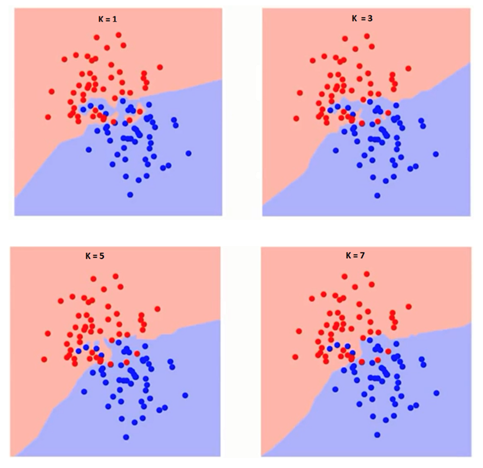

**Elbow** method to determine the optimal value of k.
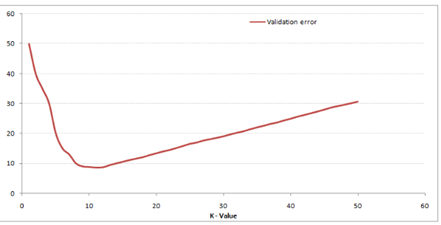

In [90]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

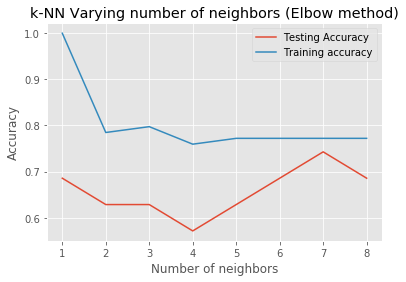

In [91]:
#Generate plot
plt.title('k-NN Varying number of neighbors (Elbow method)')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [92]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [93]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [94]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7428571428571429

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

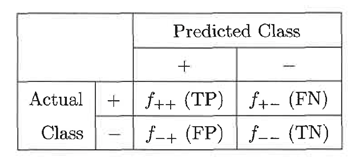

- True positive (TP) / f++ : number of positive examples correctly predicted by the classification model
- False negative (FN) / f+- : number of positive examples wrongly predicted as negative by the classification model
- False positive (FP) / f-+ : number of negative examples wrongly predicted as positive by the classification model
- True negative (TN) / f-- : number of negative examples correctly predicted by the classification model

Confusion Matrix can be represented as: 
- Given m classes (m>=2), a confusion matrix is of Size m by m

In [95]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [96]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [97]:
confusion_matrix(y_test,y_pred)

array([[ 9,  6],
       [ 3, 17]], dtype=int64)

Confusion matrix can also be obtained using crosstab method of pandas.

In [98]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,N,Y,All
True,,,
N,9,6,15
Y,3,17,20
All,12,23,35


**Classification Report**

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

**Precision** determines the fraction of records that actually turns out to be positive in the group the classifier has declared as a positive class. 
Can be thought as measure of exactness.
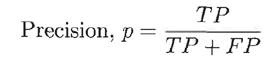
The higher the precision is, the lower the number of false positive errors committed by the classifier.

**Recall** (same as TPR) measures the fraction of positive examples correctly predicted by the classifier.
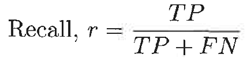

Classifiers with large recall have very few positive examples misclassified as the negative class.



Harmonic between precision & recall is known as **F1 measure**.

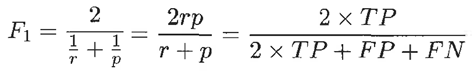

High value of F1 measure ensures that both precision and recall are high.

In [99]:
#import classification_report
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.75      0.60      0.67        15
           Y       0.74      0.85      0.79        20

   micro avg       0.74      0.74      0.74        35
   macro avg       0.74      0.72      0.73        35
weighted avg       0.74      0.74      0.74        35



**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- The area under the curve is a measure of test accuracy.

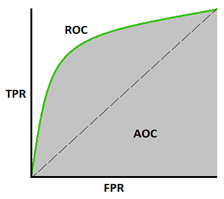

In [101]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [102]:
y_pred_proba

array([0.57142857, 0.71428571, 0.85714286, 0.42857143, 0.57142857,
       0.71428571, 1.        , 0.85714286, 0.85714286, 0.57142857,
       0.57142857, 0.57142857, 0.28571429, 0.71428571, 0.57142857,
       0.85714286, 0.71428571, 0.71428571, 0.28571429, 0.71428571,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.85714286,
       0.85714286, 0.85714286, 0.28571429, 1.        , 0.42857143,
       0.28571429, 0.85714286, 0.28571429, 0.42857143, 0.57142857])

In [103]:
from sklearn.metrics import roc_curve

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Y')

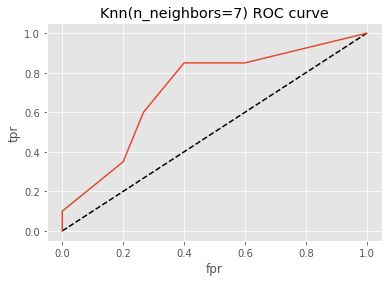

In [105]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [106]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7133333333333334

**Cross Validation**

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

**Hyperparameter tuning**

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning. 

There is a better way of doing it which involves:

- Trying a bunch of different hyperparameter values
- Fitting all of them separately
- Checking how well each performs
- Choosing the best performing one
- Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.


In [107]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [108]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [109]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

C:\Users\saura\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
knn_cv.best_score_

0.7341772151898734

In [111]:
knn_cv.best_params_

{'n_neighbors': 7}

Thus a knn classifier with number of neighbors as 7 achieves the best score/accuracy of 0.7341 i.e about 74%

###  6.3 Model Building with Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

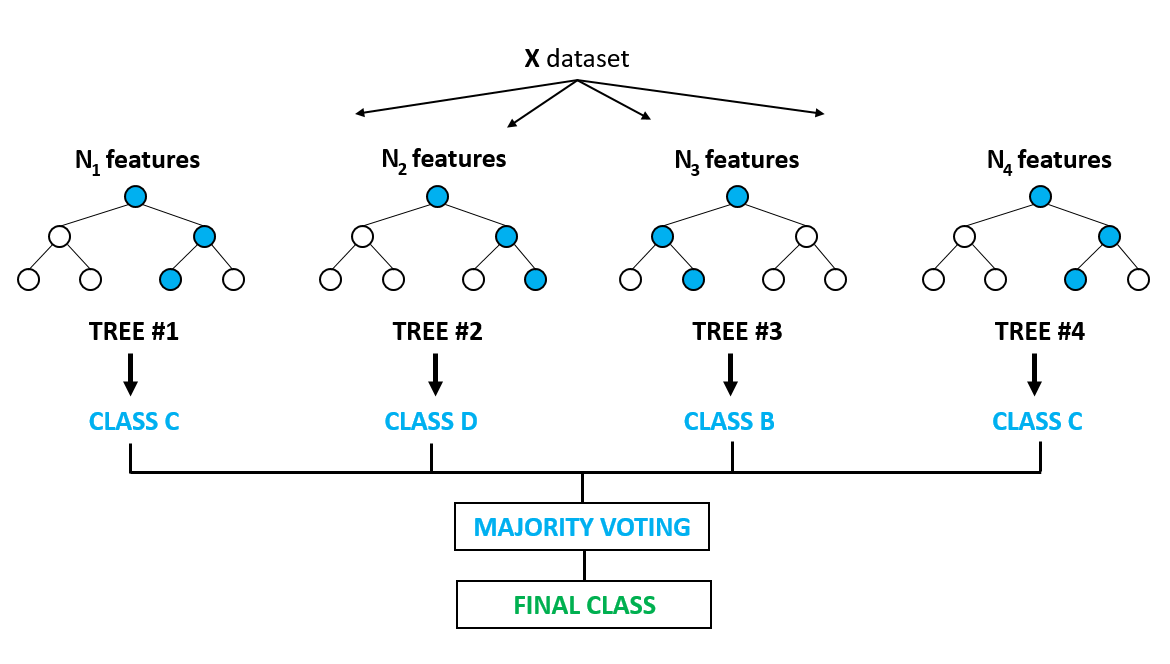

In [112]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [113]:
# Build RF Classifier model
forests = RandomForestClassifier(n_estimators=100, random_state=100)
forests.fit(X_train, y_train)
print(forests.score(X_test, y_test))  

0.7714285714285715


Score :  0.7714285714285715
Score after cross validation :  0.76


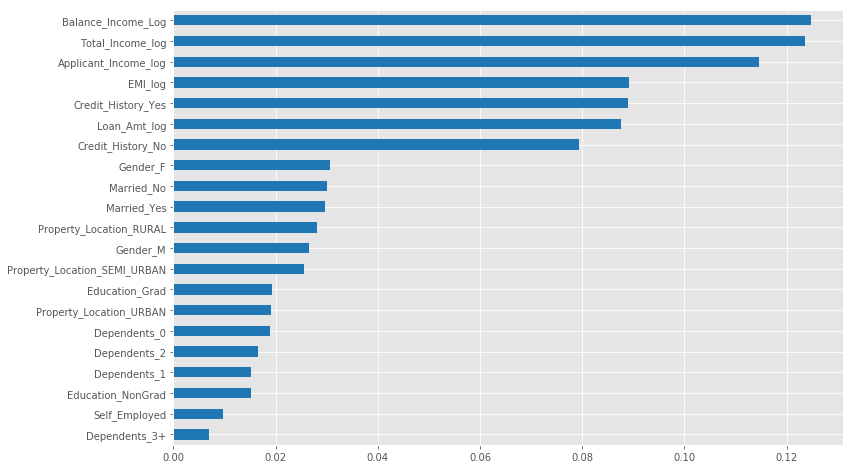

In [114]:
print("Score : " , forests.score(X_test, y_test))
# print("Feature Importance : \n", forests.feature_importances_)
importances=pd.Series(forests.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(12,8), cmap=cmap2)

scores = cross_val_score(forests, X_train, y_train, cv=5)
print("Score after cross validation : ", scores.mean())

# 7. Model Selection 
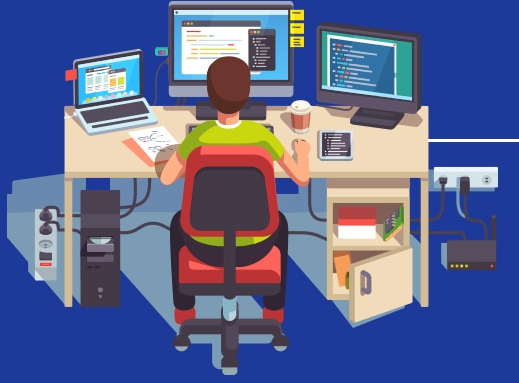

**Accuracy of kNN is around 74%** which is still descent accuracy score which can be imrproved further.

Whearas **Accuracy of RF Classifier is around 77%**.